In [1]:
import pandas as pd
from math import sqrt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

## 6.1

In [2]:
ashoka = pd.read_csv('ASHOKA.csv')
bomdyeing = pd.read_csv('BOMDYEING.csv')
bajajelec = pd.read_csv('BAJAJELEC.csv')
centuryply = pd.read_csv('CENTURYPLY.csv')
gujalkali = pd.read_csv('GUJALKALI.csv')
itdc = pd.read_csv('ITDC.csv')
jetairways = pd.read_csv('JETAIRWAYS.csv')
jklakshmi = pd.read_csv('JKLAKSHMI.csv')
laxmimach = pd.read_csv('LAXMIMACH.csv')
luxind = pd.read_csv('LUXIND.csv')

In [3]:
adanipower = pd.read_csv('ADANIPOWER.csv')
godrejind = pd.read_csv('GODREJIND.csv')
idbi = pd.read_csv('IDBI.csv')
mindtree = pd.read_csv('MINDTREE.csv')
mrpl = pd.read_csv('MRPL.csv')
nbcc = pd.read_csv('NBCC.csv')
pnb = pd.read_csv('PNB.csv')
suntv = pd.read_csv('SUNTV.csv')
voltas = pd.read_csv('VOLTAS.csv')
rblbank = pd.read_csv('RBLBANK.csv')

In [4]:
gail = pd.read_csv('GAIL.csv')
heromotoco = pd.read_csv('HEROMOTOCO.csv')
infratel = pd.read_csv('INFRATEL.csv')
lt = pd.read_csv('LT.csv')
adaniports = pd.read_csv('ADANIPORTS.csv')
asianpaint = pd.read_csv('ASIANPAINT.csv')
axisbank = pd.read_csv('AXISBANK.csv')
bajfinance = pd.read_csv('BAJFINANCE.csv')
bpcl = pd.read_csv('BPCL.csv')
eichermot = pd.read_csv('EICHERMOT.csv')

In [5]:
data = pd.concat([ashoka['Close Price'], bomdyeing['Close Price'], bajajelec['Close Price'], centuryply['Close Price'],
                  gujalkali['Close Price'], itdc['Close Price'], jetairways['Close Price'], jklakshmi['Close Price'],
                  laxmimach['Close Price'], luxind['Close Price'], adanipower['Close Price'], godrejind['Close Price'],
                  idbi['Close Price'], mindtree['Close Price'], mrpl['Close Price'], nbcc['Close Price'], pnb['Close Price'],
                  suntv['Close Price'], voltas['Close Price'], rblbank['Close Price'], gail['Close Price'],
                  heromotoco['Close Price'], infratel['Close Price'], lt['Close Price'], adaniports['Close Price'],
                  asianpaint['Close Price'], axisbank['Close Price'], bajfinance['Close Price'], bpcl['Close Price'],
                  eichermot['Close Price']], join='inner', axis=1, keys=['ASHOKA', 'BOMDYEING', 'BAJAJELEC', 'CENTURYPLY',
                                                                         'GUJALKALI', 'ITDC', 'JETAIRWAYS', 'JKLAKSHMI',
                                                                         'LAXMIMACH', 'LUXIND', 'ADANIPOWER', 'GODREJIND',
                                                                         'IDBI', 'MINDTREE', 'MRPL', 'NBCC', 'PNB', 'SUNTV',
                                                                         'VOLTAS', 'RBLBANK', 'GAIL', 'HEROMOTOCO', 'INFRATEL',
                                                                         'LT', 'ADANIPORTS', 'ASIANPAINT', 'AXISBANK',
                                                                         'BAJFINANCE', 'BPCL', 'EICHERMOT'])
print(data.shape)
data.head()

(494, 30)


,ASHOKA,BOMDYEING,BAJAJELEC,CENTURYPLY,GUJALKALI,ITDC,JETAIRWAYS,JKLAKSHMI,LAXMIMACH,LUXIND,...,GAIL,HEROMOTOCO,INFRATEL,LT,ADANIPORTS,ASIANPAINT,AXISBANK,BAJFINANCE,BPCL,EICHERMOT
0,216.05,82.20,341.15,266.65,457.35,650.15,527.50,510.80,4614.05,819.60,...,414.00,3515.45,371.05,1742.40,356.20,1148.05,500.1,1332.95,727.85,28930.60
1,214.90,83.40,347.00,266.10,455.25,636.70,534.15,527.50,4589.80,817.50,...,411.40,3619.40,376.55,1740.70,354.50,1142.85,501.5,1347.75,733.30,29362.50
2,217.00,82.25,349.85,264.85,472.65,626.75,528.90,516.20,4637.25,819.80,...,408.30,3645.95,389.90,1755.45,348.55,1154.95,502.8,1324.80,727.45,29093.55
3,209.65,78.95,334.10,260.35,461.85,604.65,522.70,478.95,4544.45,820.05,...,404.75,3592.05,378.90,1722.60,347.90,1151.35,492.0,1314.55,714.90,28357.30
4,206.25,77.15,336.20,254.05,455.35,594.30,520.40,469.55,4522.70,817.80,...,401.05,3571.65,378.95,1724.55,349.45,1123.15,501.7,1289.15,702.45,27936.05


## 6.2

In [6]:
returns = data.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = data.pct_change().std() * sqrt(252)
returns

,Returns,Volatility
ASHOKA,-0.208509,0.442974
BOMDYEING,0.327621,0.602869
BAJAJELEC,0.316053,0.402414
CENTURYPLY,-0.182338,0.375269
GUJALKALI,0.112144,0.385492
ITDC,-0.369385,0.527760
JETAIRWAYS,-0.481019,0.624854
JKLAKSHMI,-0.168865,0.279668
LAXMIMACH,0.118883,0.267328
LUXIND,0.255161,0.335409


## 6.3

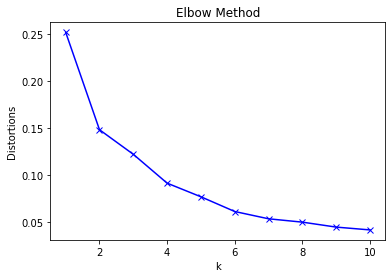

In [7]:
info = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
x = info
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method')
plt.show()

## 6.4

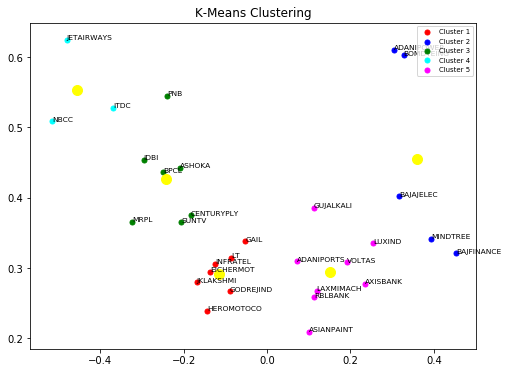

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)
companies = list(returns.index)
plt.figure(figsize=[8,6])
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=25, c='red', label='Cluster 1')  
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=25, c='blue', label='Cluster 2')  
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=25, c='green', label='Cluster 3')  
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=25, c='cyan', label='Cluster 4')  
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=25, c='magenta', label='Cluster 5')  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow')
for i,txt in enumerate(companies):
    plt.annotate(txt, (x[i, 0], x[i, 1]), fontsize=7.5)
plt.legend(loc='upper right', fontsize='x-small')
plt.title('K-Means Clustering')
plt.show()

In [9]:
returns['Cluster'] = [int(cluster[0]) for cluster in zip(y_kmeans)]
returns

,Returns,Volatility,Cluster
ASHOKA,-0.208509,0.442974,2
BOMDYEING,0.327621,0.602869,1
BAJAJELEC,0.316053,0.402414,1
CENTURYPLY,-0.182338,0.375269,2
GUJALKALI,0.112144,0.385492,4
ITDC,-0.369385,0.527760,3
JETAIRWAYS,-0.481019,0.624854,3
JKLAKSHMI,-0.168865,0.279668,0
LAXMIMACH,0.118883,0.267328,4
LUXIND,0.255161,0.335409,4
